# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [76]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#check to see what this is actually collecting
#cities

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
#url for weather data
url = "http://api.openweathermap.org/data/2.5/weather?"

In [78]:
#initialize the lists for all the data
lat_list = []
long_list = []
max_temp_list = []
clouds_list = []
humidity_list = []
wind_list = []
country_list = []
city_list = []
date_list = []

#signaling the beginning of the data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")

#loop to get city data
for city in cities:
    
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city

    #json request
    response = requests.get(query_url).json()

    #conditional to check for cities not found
    if response == {'cod': '404', 'message': 'city not found'}:
        print("City not found. Skipping...")
    
    #conditional for cities found
    else:
        
        #sanity check
        #pprint.pprint(response)
        
        #save the new city list
        city_list.append(city)
        
        #save the latitude
        lat = (response['coord']['lat'])
        lat_list.append(lat)
        
        #save the longitude
        long = (response['coord']['lon'])
        long_list.append(long)
        
        #sanity check
        #print(lat)
        
        #save the temperature
        max_temp = (response['main']['temp_max'])
        max_temp_list.append(max_temp)
        
        #save the cloudiness
        clouds = (response['clouds']['all'])
        clouds_list.append(clouds)
        
        #save the humidity
        humidity = (response['main']['humidity'])
        humidity_list.append(humidity)
        
        #save the wind speed
        wind = (response['wind']['speed'])
        wind_list.append(wind)
        
        #save the country
        country = (response['sys']['country'])
        country_list.append(country)
        
        #save the date
        date = (response['dt'])
        date_list.append(date)
        
        #print the record for each city
        print(f'Processing Record {cities.index(city) + 1} of Set  | {city}')
 

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set  | namibe
Processing Record 2 of Set  | bluff
Processing Record 3 of Set  | oussouye
Processing Record 4 of Set  | georgetown
Processing Record 5 of Set  | hermanus
Processing Record 6 of Set  | guerrero negro
Processing Record 7 of Set  | port alfred
Processing Record 8 of Set  | tommot
Processing Record 9 of Set  | rikitea
Processing Record 10 of Set  | tasiilaq
Processing Record 11 of Set  | baruun-urt
Processing Record 12 of Set  | mataura
Processing Record 13 of Set  | mount isa
Processing Record 14 of Set  | kapaa
Processing Record 15 of Set  | busselton
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set  | bredasdorp
Processing Record 19 of Set  | olafsvik
Processing Record 20 of Set  | palana
Processing Record 21 of Set  | magadan
Processing Record 22 of Set  | tiksi
Processing Record 23 of Set  | ribeira grande
Processing Record 24 of Set  | chokurdakh
Processing 

Processing Record 207 of Set  | provideniya
Processing Record 208 of Set  | bubaque
Processing Record 209 of Set  | sol-iletsk
Processing Record 210 of Set  | aripuana
Processing Record 211 of Set  | huarmey
Processing Record 212 of Set  | labuhan
Processing Record 213 of Set  | high level
Processing Record 214 of Set  | puerto colombia
Processing Record 215 of Set  | mareeba
Processing Record 216 of Set  | puerto baquerizo moreno
Processing Record 217 of Set  | barrow
Processing Record 218 of Set  | castro
Processing Record 219 of Set  | coahuayana
Processing Record 220 of Set  | vestmannaeyjar
Processing Record 221 of Set  | kavaratti
Processing Record 222 of Set  | biak
Processing Record 223 of Set  | sulejowek
Processing Record 224 of Set  | san cristobal
Processing Record 225 of Set  | north battleford
Processing Record 226 of Set  | qaqortoq
Processing Record 227 of Set  | crimmitschau
Processing Record 228 of Set  | ngaoundere
Processing Record 229 of Set  | mitchell
Processing 

Processing Record 411 of Set  | abancay
City not found. Skipping...
Processing Record 413 of Set  | deogarh
Processing Record 414 of Set  | hanyang
Processing Record 415 of Set  | aljezur
Processing Record 416 of Set  | kuytun
Processing Record 417 of Set  | darhan
City not found. Skipping...
Processing Record 419 of Set  | touros
Processing Record 420 of Set  | rio grande
Processing Record 421 of Set  | bereda
Processing Record 422 of Set  | terney
Processing Record 423 of Set  | levokumskoye
Processing Record 424 of Set  | monte alegre
Processing Record 425 of Set  | college
Processing Record 426 of Set  | saravan
Processing Record 427 of Set  | biltine
Processing Record 428 of Set  | padang
Processing Record 429 of Set  | karratha
Processing Record 430 of Set  | ancud
Processing Record 431 of Set  | sao felix do xingu
Processing Record 432 of Set  | chirongui
Processing Record 433 of Set  | chinhoyi
Processing Record 434 of Set  | le mars
Processing Record 435 of Set  | worthington


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
#creating the dictionary for the data frame
weather_data = {'city':city_list, 'lat':lat_list, 'lng':long_list, 'Max Temp': max_temp_list, 'Humidity': humidity_list, 'Cloudiness': clouds_list, 'Wind Speed': wind_list, 'Country': country_list, 'Date':date_list}

In [80]:
#sanity check
#print(len(city_list))
#print(len(lat_list))
#print(len(long_list))
#print(len(max_temp_list))
#print(len(humidity_list))
#print(len(wind_list))
#print(len(date_list))
#print(len(clouds_list))
#print(len(country_list))

In [81]:
#create the weather data frame
weather_df = pd.DataFrame(weather_data)

In [82]:
#sanity check
weather_df.count()  

city          550
lat           550
lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [83]:
#displaying the data frame
weather_df

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namibe,-15.20,12.15,291.95,65,0,1.02,AO,1595460278
1,bluff,-46.60,168.33,277.04,83,96,1.34,NZ,1595460248
2,oussouye,12.48,-16.55,301.15,94,20,2.10,SN,1595460789
3,georgetown,5.41,100.34,298.15,94,20,2.82,MY,1595460012
4,hermanus,-34.42,19.23,284.82,91,0,0.45,ZA,1595460242
...,...,...,...,...,...,...,...,...,...
545,kloulklubed,7.04,134.26,300.15,88,75,3.04,PW,1595460904
546,srednekolymsk,67.45,153.68,301.26,30,87,3.92,RU,1595460905
547,uruzgan,32.83,66.00,291.27,25,0,2.28,AF,1595460905
548,celles,50.71,3.46,286.48,84,7,0.93,BE,1595460905


In [84]:
#output the file
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [85]:
#check to see if there are cities with humidity greater than 100
weather_df[weather_df.Humidity > 100]

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

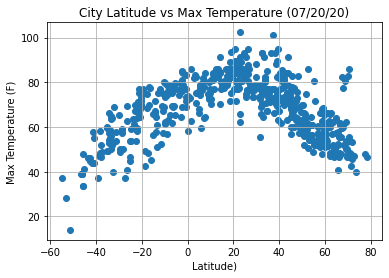

In [86]:
#pulling the values to be graphed
max_temp_data = weather_df['Max Temp'].tolist()
latitude_data = weather_df['lat'].tolist()

#convert the temperature data
converted_temp = []

for item in max_temp_data:
    f = (float(item) - 273.15) * 1.8 + 32
    converted_temp.append(f)

#sanity check
#print(max_temp_data)

#adding labels
plt.xlabel("Latitude)")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (07/20/20)")

#plotting the graph
plt.scatter(latitude_data, converted_temp)

#adding a grid
plt.grid(True)

plt.savefig('output_data/fig1.png')

plt.show()

## Latitude vs. Humidity Plot

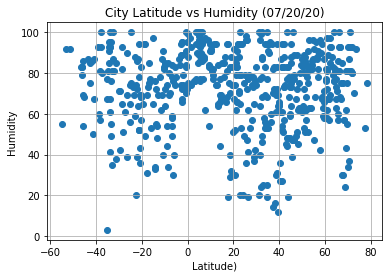

In [87]:
#pulling the values to be graphed
humidity_data = weather_df['Humidity'].tolist()

#adding labels
plt.xlabel("Latitude)")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (07/20/20)")

#plotting the graph
plt.scatter(latitude_data, humidity_data)

#adding a grid
plt.grid(True)

plt.savefig('output_data/fig2.png')

plt.show()

## Latitude vs. Cloudiness Plot

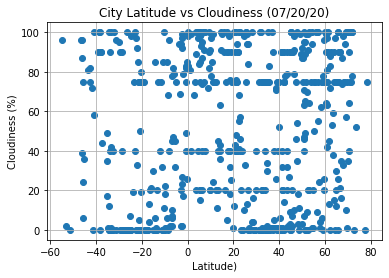

In [88]:
#pulling the values to be graphed
cloud_data = weather_df['Cloudiness'].tolist()

#adding labels
plt.xlabel("Latitude)")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (07/20/20)")

#plotting the graph
plt.scatter(latitude_data, cloud_data)

#adding a grid
plt.grid(True)

plt.savefig('output_data/fig3.png')

plt.show()

## Latitude vs. Wind Speed Plot

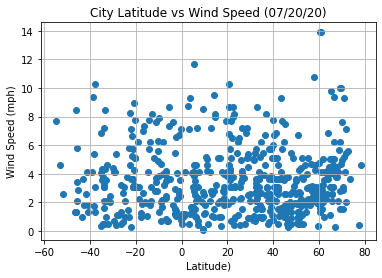

In [89]:
#pulling the values to be graphed
wind_data = weather_df['Wind Speed'].tolist()

#adding labels
plt.xlabel("Latitude)")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (07/20/20)")

#plotting the graph
plt.scatter(latitude_data, wind_data)

#adding a grid
plt.grid(True)

plt.savefig('output_data/fig4.png')

plt.show()

## Linear Regression

In [90]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df.lat >= 0]
southern_df = weather_df[weather_df.lat < 0]

#sanity check
#northern_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45862097797641616


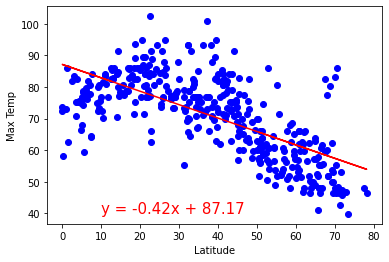

In [91]:
#xvalues
x_values = northern_df['lat']

#convert the temperature data
north_converted_temp = []

for item in northern_df['Max Temp']:
    f = (float(item) - 273.15) * 1.8 + 32
    north_converted_temp.append(f)

#yvalues
y_values = north_converted_temp


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#plot it
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6199496647502201


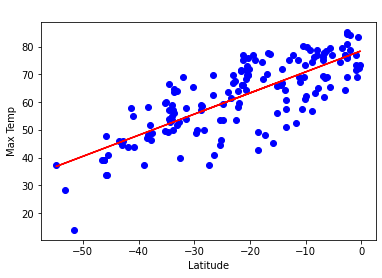

In [92]:
#xvalues
x_values = southern_df['lat']

#convert the temperature data
south_converted_temp = []

for item in southern_df['Max Temp']:
    f = (float(item) - 273.15) * 1.8 + 32
    south_converted_temp.append(f)

#yvalues
y_values = south_converted_temp


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#plot it
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010133788278062134


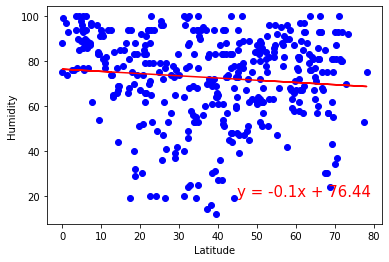

In [93]:
#xvalues
x_values = northern_df['lat']

#yvalues
y_values = northern_df['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#plot it
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001892460209899285


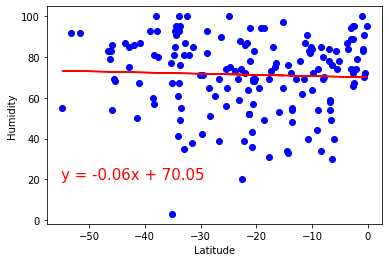

In [94]:
#xvalues
x_values = southern_df['lat']

#yvalues
y_values = southern_df['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#plot it
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002322133844514059


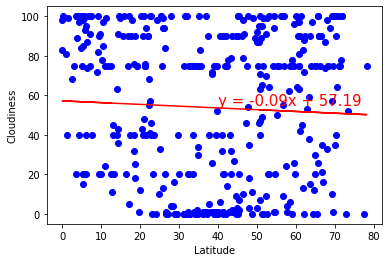

In [95]:
#xvalues
x_values = northern_df['lat']

#yvalues
y_values = northern_df['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,55),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#plot it
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0013712409861580143


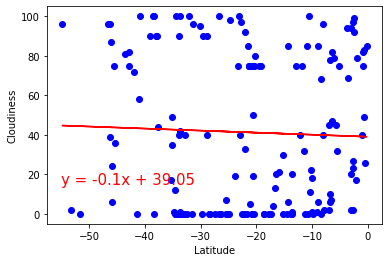

In [96]:
#xvalues
x_values = southern_df['lat']

#yvalues
y_values = southern_df['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 15),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#plot it
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0031567708386669884


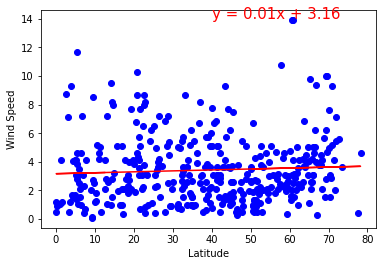

In [97]:
#xvalues
x_values = northern_df['lat']

#yvalues
y_values = northern_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,14),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#plot it
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001593939636651769


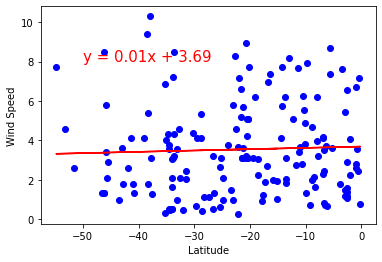

In [98]:
#xvalues
x_values = southern_df['lat']

#yvalues
y_values = southern_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 8),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#plot it
plt.show()